In [16]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 

%matplotlib inline

In [2]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]] # petal length, petal width
y = (iris.target == 2).astype(np.float64) # Iris-Virginica

In [3]:
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C = 1, loss='hinge'))
])

svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [4]:
accuracy_score(y, svm_clf.predict(X))

0.9533333333333334

### Non Linear SVM Classificatin

In [6]:
moons = datasets.make_moons()

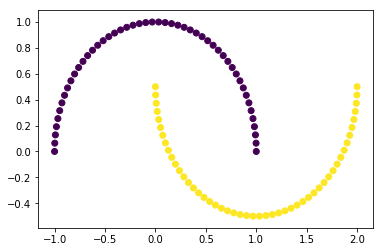

In [38]:
plt.scatter(moons[0][:,0], moons[0][:,1], c=moons[1])
plt.show()

In [41]:
X = moons[0]
y = moons[1]

In [47]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
            ('poly_features', PolynomialFeatures(degree=2)),
            ('scaler', StandardScaler()),
            ('svm_clf', LinearSVC(C=10, loss='hinge'))
])

In [48]:
polynomial_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

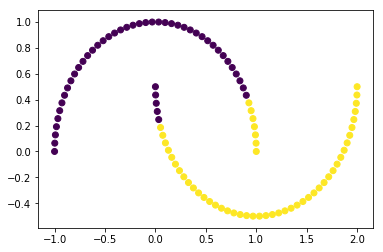

In [49]:
plt.scatter(moons[0][:,0], moons[0][:,1], c=polynomial_svm_clf.predict(X))
plt.show()

<em> Higher the #polynomial degrees, higher the accuracy

In [59]:
# Doing the same this using the Polynomial Kernel

from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
                ('scaler', StandardScaler()),
                ('svm_clf', SVC(kernel='poly', degree=3, coef0=0, C=5))
])

In [60]:
poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [62]:
accuracy_score(y, poly_kernel_svm_clf.predict(X))

0.88

### Adding Similarity Features

In [64]:
rbf_kernel_svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
))

rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [65]:
accuracy_score(y, rbf_kernel_svm_clf.predict(X))

1.0

In [68]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

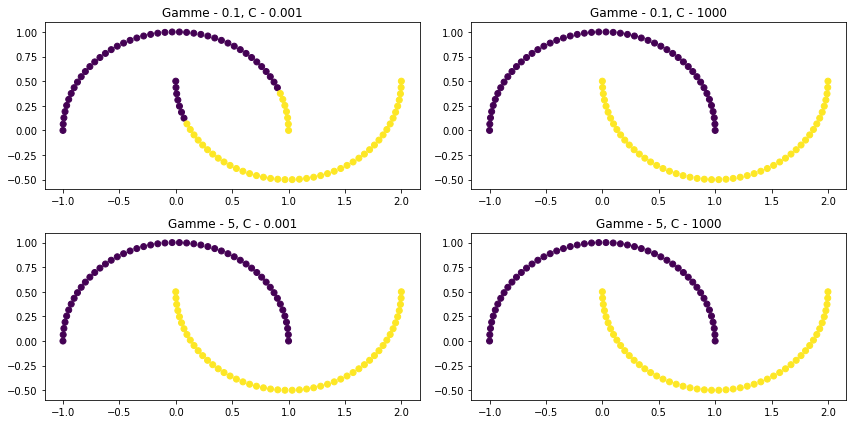

In [95]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,6))

C = [0.001, 1000]
gamma = [0.1, 5]

for i in range(2):
    for j in range(2):
        rbf_clf = SVC(kernel='rbf', gamma=gamma[i], C=C[j])
        rbf_clf.fit(scaled_X, y)
        axes[i,j].scatter(moons[0][:,0], moons[0][:,1], c=rbf_clf.predict(scaled_X))
        axes[i,j].set_title('Gamme - {}, C - {}'.format(gamma[i], C[j]))

# axes[0,0].scatter(moons[0][:,0], moons[0][:,1], c=rbf_clf.predict(scaled_X))
plt.tight_layout()
plt.show()

<em> Increasing
gamma makes the bell-shape curve narrower, and as a
result each instance’s range of influence is smaller: the decision boundary ends up
being more irregular, wiggling around individual instances. Conversely, a small gamma
value makes the bell-shaped curve wider, so instances have a larger range of influence,
and the decision boundary ends up smoother. 
    
- This works inversely to increasing sigma^2 in Gaussian Kernals 
- γ acts like a regularization hyperparameter: if your model is overfitting, you should reduce it
- if it is underfitting, you should increase it (similar to the C hyperparameter).